In [54]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn import linear_model
import random

In [55]:
# Setting
nodeCount = 6

In [56]:
nodeCount = nodeCount - nodeCount % 2
nodes = []
links = []
lastNode = nodeCount
for i in range (nodeCount):
    nodes.append(i) # 65 : A
G = nx.DiGraph()
# RING network
for i in range( nodeCount ):
    links.append( (nodes[i], nodes[(i+1)%nodeCount]) )
    links.append( (nodes[i], nodes[(i+nodeCount-1)%nodeCount]) )
# STAR network
# nodes.append( lastNode )
# for i in range( nodeCount ):
#     links.append( (nodes[i], lastNode) )
#     links.append( (lastNode, nodes[i]) )
# Implement network
G.add_nodes_from(nodes)
G.add_edges_from(links)

In [57]:
# node name
names = {}
for name in nodes:
    names[name] = name
# link name
linknames = {}
for link in links:
    linknames[link] = ''
# source-receiver (origin-destination) list
od_list = []
for i in range(nodeCount):
    od_list.append((nodes[i], nodes[int((i+nodeCount/2)%nodeCount)]))

{(0, 6): Text(-0.4996725896343018, 0.014098123790147703, ''),
 (6, 0): Text(-0.4996725896343018, 0.014098123790147703, ''),
 (1, 6): Text(-0.26164183575317707, -0.42587375824139145, ''),
 (6, 1): Text(-0.26164183575317707, -0.42587375824139145, ''),
 (2, 6): Text(-0.23717273659617324, 0.439732481866531, ''),
 (6, 2): Text(-0.23717273659617324, 0.439732481866531, ''),
 (3, 6): Text(0.5001804298734326, -0.014375006901427753, ''),
 (6, 3): Text(0.5001804298734326, -0.014375006901427753, ''),
 (4, 6): Text(0.26236160903544875, 0.42500113648971927, ''),
 (6, 4): Text(0.26236160903544875, 0.42500113648971927, ''),
 (5, 6): Text(0.2375821749032619, -0.43958915250354286, ''),
 (6, 5): Text(0.2375821749032619, -0.43958915250354286, '')}

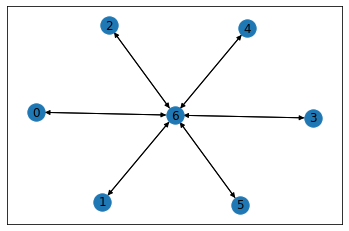

In [58]:
pos = nx.spring_layout(G, k=0.8)
nx.draw_networkx(G, pos, labels=names)
nx.draw_networkx_edge_labels(G, pos, edge_labels=linknames)

In [59]:
# 1000パケット送信したときのパケット通過数 (the number of packets passed when 1000 packets are transmitted)
od_success = {}
for od in od_list:
    od_success[ od ] = 900
print(od_success)

{(0, 3): 900, (1, 4): 900, (2, 5): 900, (3, 0): 900, (4, 1): 900, (5, 2): 900}


In [60]:
# ベクトル\hat{y}をy_e2eとして作成 (generate vector \hat{y} as y_e2e)
y = np.zeros(len(od_list)) # 初期化 (initialization)
for i in range(len(od_list)):
    print(od_list[i], od_success[od_list[i]])
    y[i] = od_success[od_list[i]]
y_e2e = -np.log(y/1000)

(0, 3) 900
(1, 4) 900
(2, 5) 900
(3, 0) 900
(4, 1) 900
(5, 2) 900


In [61]:
y

array([900., 900., 900., 900., 900., 900.])

In [62]:
y_e2e

array([0.10536052, 0.10536052, 0.10536052, 0.10536052, 0.10536052,
       0.10536052])

In [63]:
A = np.zeros((len(od_list), len(links))) # 初期化 (initialization)
for i in range(len(od_list)):
    print(od_list[i])
    paths = list(nx.all_simple_paths(G, od_list[i][0], od_list[i][1]))
    idx = random.randint(0, len(paths)-1)
    # path = nx.shortest_path(G, od_list[i][0], od_list[i][1])
    path = paths[idx]
    print(path)
    for j in range(len(path)-1):
        k = links.index((path[j], path[j+1]))
        A[i,k] = 1

(0, 3)
[0, 6, 3]
(1, 4)
[1, 6, 4]
(2, 5)
[2, 6, 5]
(3, 0)
[3, 6, 0]
(4, 1)
[4, 6, 1]
(5, 2)
[5, 6, 2]


In [64]:
A

array([[1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [65]:
# 関数csを定義 (define function cs)
def cs(X, Y, alpha, positive):
    clf = linear_model.Lasso(alpha=alpha, fit_intercept=False, normalize=False, positive=positive)
    clf.fit(X,Y)
    return clf.coef_

[0.09950114 0.09950114 0.09950114 0.09950114 0.09950114 0.09950114
 0.         0.         0.         0.         0.         0.        ]
[9.60593376e-02 9.60593376e-02 9.60593376e-02 9.60593376e-02
 9.60593376e-02 9.60593376e-02 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17]
[0.09059582 0.09059582 0.09059582 0.09059582 0.09059582 0.09059582
 0.         0.         0.         0.         0.         0.        ]
[0.08192302 0.08192302 0.08192302 0.08192302 0.08192302 0.08192302
 0.         0.         0.         0.         0.         0.        ]
[0.0681558 0.0681558 0.0681558 0.0681558 0.0681558 0.0681558 0.
 0.        0.        0.        0.        0.       ]
[0.04630172 0.04630172 0.04630172 0.04630172 0.04630172 0.04630172
 0.         0.         0.         0.         0.         0.        ]
[0.01161052 0.01161052 0.01161052 0.01161052 0.01161052 0.01161052
 0.         0.         0.         0.         0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 0. 

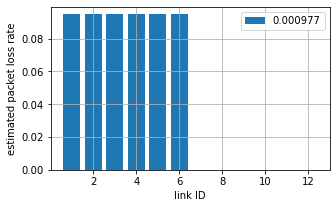

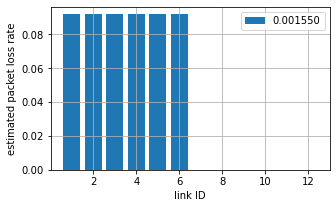

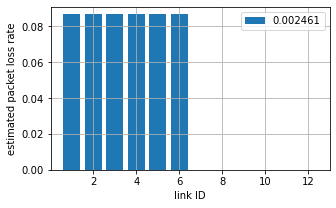

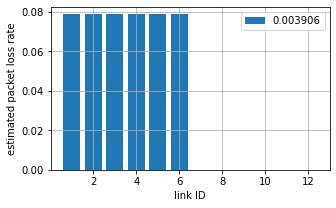

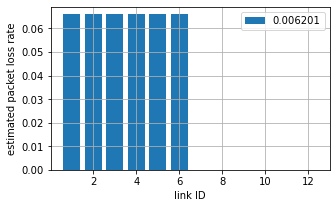

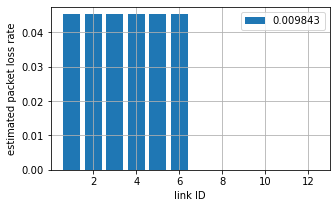

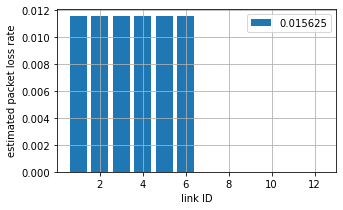

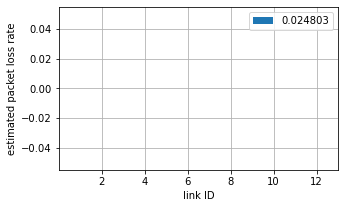

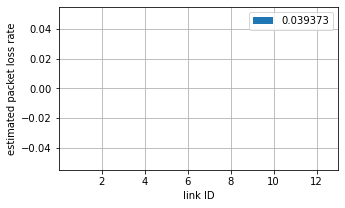

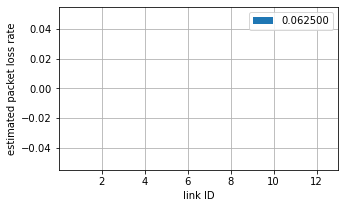

In [66]:
# csのXにAを,Yにy_e2eを代入して\hat{x}を計算.estが\hat{x} (Calculate \hat{x} by substituting A for X and y_e2e for Y in cs. est is \hat{x})
# alphaを変えて実験 (Experiment by changing alpha)
for ALPHA in np.logspace(-10, -4, 10, base=2):
    est = cs(A, y_e2e, alpha=ALPHA, positive=True)
    print(est)
    plt.figure(figsize=(5,3))
    plt.grid()
    plt.bar(range(1, len(est)+1), 1 - np.exp(-est), label='%f' %ALPHA )
    plt.legend()
    plt.xlabel('link ID')
    plt.ylabel('estimated packet loss rate')